# Freewill EEG Dataset Exploration

This notebook allows you to interactively explore the Freewill EEG Reaching Grasping dataset.

In [1]:
import numpy as np
import scipy as sc
from scipy.io import loadmat
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Load Data
Loading the .mat file for Subject 01, Session 01.

In [2]:
# Adjust path to go up one level from 'notebooks' directory
path = "../.data/Freewill_EEG_Reaching_Grasping 2/derivatives/matfiles/sub-01/ses-01/sub-01_ses-01_task-reachingandgrasping_eeg.mat"

data = loadmat(path, simplify_cells=True)['data']

## Extract Information

In [3]:
fs = data['fs']
channel_names = data['channelName']
raw_eeg = data['rawEEG']
data_table = data['dataTable']

print(f"Sampling Frequency: {fs} Hz")
print(f"Channels: {channel_names}")

Sampling Frequency: 250 Hz
Channels: ['Fp1' 'Fz' 'F3' 'F7' 'FT9' 'FC5' 'FC1' 'C3' 'T7' 'TP9' 'CP5' 'CP1' 'Pz'
 'P3' 'P7' 'O1' 'Oz' 'O2' 'P4' 'P8' 'TP10' 'CP6' 'CP2' 'C4' 'T8' 'FT10'
 'FC6' 'FC2' 'F4' 'F8' 'Fp2' 'EOGU' 'EOGD' 'EOGL' 'EOGR' 'TRIG' 'X' 'Y'
 'Z']


## Process Data Table

In [4]:
df_data_table = pd.DataFrame(data_table[1:], columns=data_table[0]).dropna()
df_data_table.head()

,Run,TrialNumber,Tgt1,Tgt2,Tgt3,Tgt4,TrialDiscardIndex,EEGFileNumber,Comments,TgtID,TrialStartIndex,TrialEndIndex,AccStartIndex,AccDetectionFlag,TRIGSTARTDetectionFlag,TRIGENDDetectionFlag
0,1,1,0,0,0,1,0,0001,[],4,1427,4419,1671,0,0,0
1,1,2,1,0,0,0,0,0001,[],1,6171,9201,6522,0,0,0
2,1,3,0,0,1,0,0,0001,[],3,10958,13963,11362,0,0,0
3,1,4,0,0,0,1,0,0001,[],4,15727,18740,15947,1,0,0
4,1,5,0,1,0,0,0,0001,[],2,20509,23504,20953,0,1,0


## Create EEG DataFrame

In [5]:
acc_start = df_data_table['AccStartIndex'].dropna().astype(int).values - 1
eeg_data_ch1 = raw_eeg[0].T[:, 0]

df = pd.DataFrame(raw_eeg[0].T, columns=data['channelName'])

# Mark acceleration start events
df['AccStart'] = 0
df.loc[acc_start, 'AccStart'] = 1000000

## Visualization

<Figure size 1500x800 with 0 Axes>

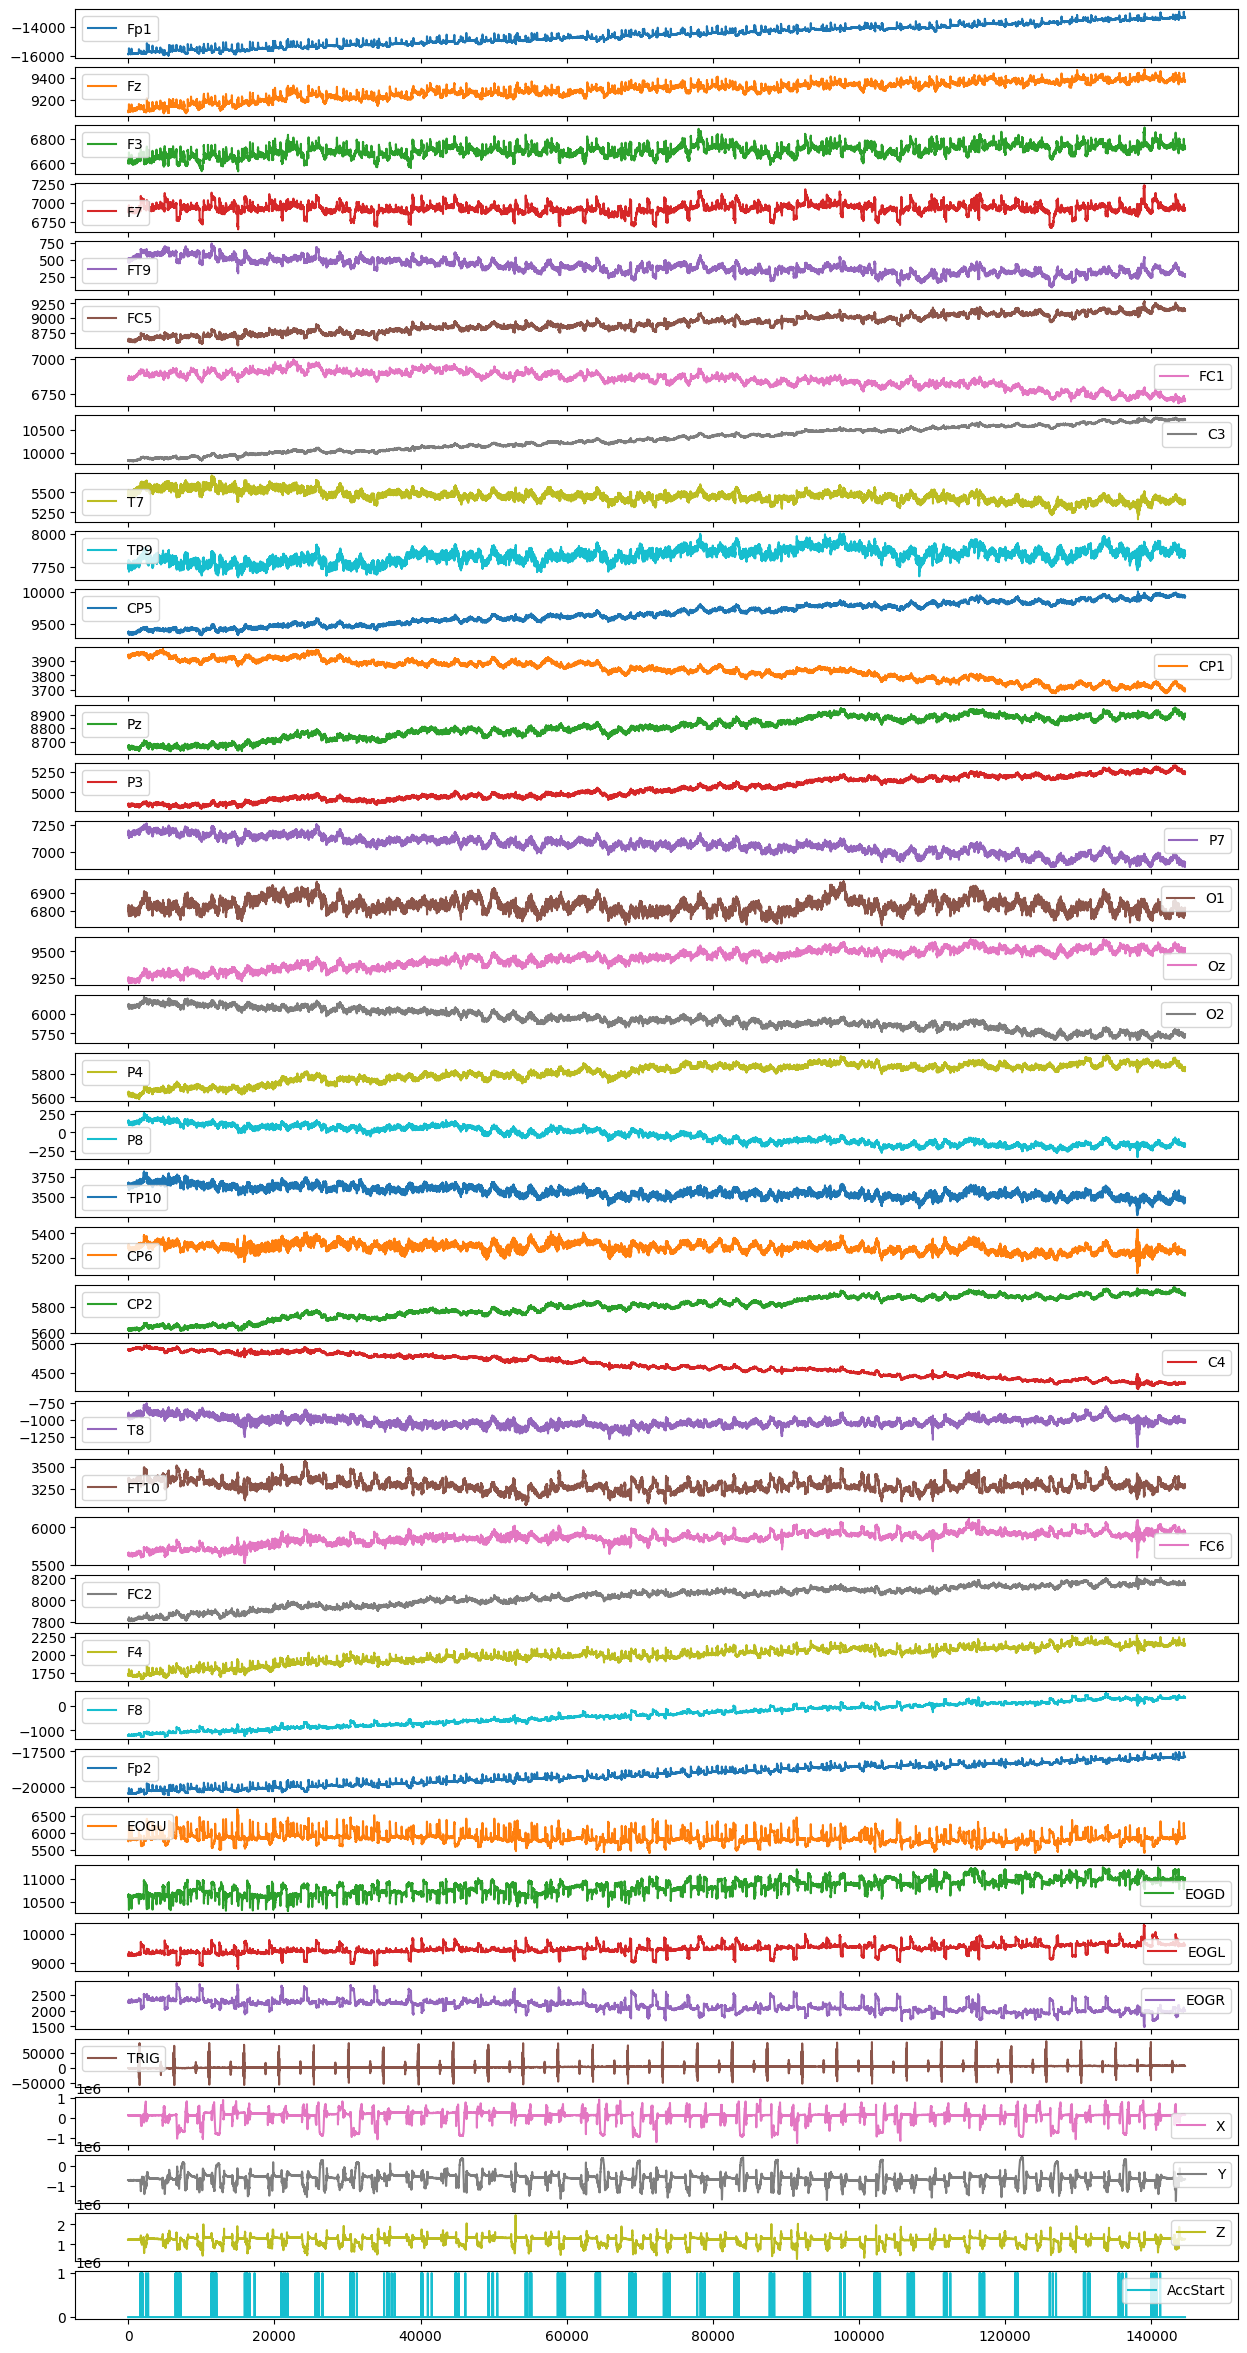

In [6]:
plt.figure(figsize=(15, 8))
df.plot(subplots=True, figsize=(15, 30))
plt.show()